## Score Paragraph level

In [8]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# def analyze_scores(folder_path: str):
#     """
#     Read and analyze scores from all JSON files in the folder.
    
#     Args:
#         folder_path: Path to folder containing JSON files
    
#     Returns:
#         dict: Sum of scores for each question
#         int: Total number of files processed
#     """
#     # Initialize score sums for Q1-Q15
#     direct_score_sums = {f"Q{i}": 0 for i in range(1, 16)}
#     score_sums = {f"Q{i}": 0 for i in range(1, 16)}
    
#     # Get list of JSON files
#     json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
#     total_files = len(json_files)
    
#     print(f"Found {total_files} files to process")
    
#     # Process each file
#     for filename in tqdm(json_files, desc="Processing files"):
#         try:
#             with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as f:
#                 data = json.load(f)
                
#                 # Sum scores for each question
#                 for q_num in range(1, 16):
#                     key = f"Q{q_num}"
#                     if key in data and 'direct_score' in data[key]:
#                         direct_score_sums[key] += data[key]['direct_score']
#                         score_sums[key] += data[key]['score']    
                        
#         except Exception as e:
#             print(f"Error processing {filename}: {e}")
    
#     return direct_score_sums, score_sums, total_files

def analyze_scores(folder_path: str):
    """
    Read and analyze scores from all JSON files in the folder.
    Tracks direct_score and score separately, and counts when both are 1.
    
    Args:
        folder_path: Path to folder containing JSON files
    
    Returns:
        dict: Sum of direct scores (excluding 0.5)
        dict: Sum of scores (excluding 0.5)
        dict: Count of 0.5 values for direct_score
        dict: Count of 0.5 values for score
        dict: Total counts for each type of score
        dict: Count of cases where both scores are 1
    """
    # Initialize dictionaries for Q1-Q15
    direct_score_sums = {f"Q{i}": 0 for i in range(1, 16)}
    score_sums = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Track 0.5 counts separately for each type
    direct_half_counts = {f"Q{i}": 0 for i in range(1, 16)}
    score_half_counts = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Track total counts for each type
    direct_total_counts = {f"Q{i}": 0 for i in range(1, 16)}
    score_total_counts = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Track when both scores are 1
    both_ones_counts = {f"Q{i}": 0 for i in range(1, 16)}
    both_zero_counts = {f"Q{i}": 0 for i in range(1, 16)}
    
    # Get list of JSON files
    json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    total_files = len(json_files)
    
    print(f"Found {total_files} files to process")
    
    # Process each file
    for filename in tqdm(json_files, desc="Processing files"):
        try:
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # Process scores for each question
                for q_num in range(1, 16):
                    key = f"Q{q_num}"
                    if key in data:
                        # Process direct_score
                        if 'direct_score' in data[key]:
                            direct_score = data[key]['direct_score']
                            direct_total_counts[key] += 1
                            
                            if direct_score == 0.5:
                                direct_half_counts[key] += 1
                            else:
                                direct_score_sums[key] += direct_score
                        
                        # Process score separately
                        if 'score' in data[key]:
                            score = data[key]['score']
                            score_total_counts[key] += 1
                            
                            if score == 0.5:
                                score_half_counts[key] += 1
                            else:
                                score_sums[key] += score
                        
                        # Check if both scores are 1 (and not 0.5)
                        if ('direct_score' in data[key] and 'score' in data[key] and 
                            data[key]['direct_score'] == 1 and data[key]['score'] == 1):
                            both_ones_counts[key] += 1

                        # Check if both scores are 1 (and not 0.5)
                        if ('direct_score' in data[key] and 'score' in data[key] and 
                            data[key]['direct_score'] == 0 and data[key]['score'] == 0):
                            both_zero_counts[key] += 1
                        
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    
    # Print summary for direct_score
    print("\nDirect Score:")
    print("-" * 40)
    for key in direct_total_counts:
        if direct_total_counts[key] > 0:
            half_ratio = direct_half_counts[key] / direct_total_counts[key]
            facts = direct_total_counts[key] - direct_half_counts[key] - direct_score_sums[key]
            print(f"{key}:")
            print(f"  Total count: {direct_total_counts[key]}  Facts: {facts}")
            print(f"  0.5 count: {direct_half_counts[key]} ({half_ratio:.2%})")
            print(f"  Sum (excluding 0.5): {direct_score_sums[key]}")
    
    # Print summary for score
    print("\nScore:")
    print("-" * 40)
    for key in score_total_counts:
        if score_total_counts[key] > 0:
            half_ratio = score_half_counts[key] / score_total_counts[key]
            print(f"{key}:")
            print(f"  Total count: {score_total_counts[key]}")
            print(f"  0.5 count: {score_half_counts[key]} ({half_ratio:.2%})")
            print(f"  Sum (excluding 0.5): {score_sums[key]}")
    
    # Print summary of both scores being 1
    print("\nBoth Scores = 1:")
    print("-" * 40)
    for key in both_ones_counts:
        if direct_total_counts[key] > 0 and score_total_counts[key] > 0:
            print(f"{key}: {both_ones_counts[key]} cases")

    # Print summary of both scores being 0
    print("\nBoth Scores = 0:")
    print("-" * 40)
    for key in both_zero_counts:
        if direct_total_counts[key] > 0 and score_total_counts[key] > 0:
            print(f"{key}: {both_zero_counts[key]} cases")
    
    return (direct_score_sums, score_sums, total_files,
            direct_half_counts, score_half_counts, 
            direct_total_counts, score_total_counts)

def plot_scores(score_sums: dict, total_files: int, name: str):
    """
    Create a bar plot of the scores.
    
    Args:
        score_sums: Dictionary containing sum of scores for each question
        total_files: Total number of files processed
        name: Name for saving the plot
    """

    x_axes_names = {
        1: "Title and purpose.",
        2: "Condition studied.",
        3: "Design Details.",
        4: "Interventions.",
        5: "Study Arms.",
        6: "Eligibility Criteria.",
        7: "Primary Outcome measured.",
        8: "Primary Outcome Statistical Analysis.",
        9: "Primary Outcome Statistical Results.",
        10: "Secondary Outcomes Overview.",
        11: "Secondary Outcomes Statistical Approach",
        12: "Secondary Outcomes Key Results.",
        13: "Serious Adverse Events.",
        14: "Non-Serious Adverse Events. ",
        15: "Key Observations and Clinical Relevance."
    }
    
    # Prepare data for plotting
    questions = list(range(1, 16))
    scores = [score_sums[f"Q{i}"] for i in questions]
    
    # Create figure and axis with larger size
    plt.figure(figsize=(20, 10))
    
    # Create bar plot
    bars = plt.bar(questions, scores)
    
    # Customize plot
    plt.title('Sum of Scores by Question Category vs Summary DataBase', fontsize=16, pad=20)
    plt.xlabel('Question Categories', fontsize=14)
    plt.ylabel('Sum of Scores', fontsize=14)
    
    # Set x-axis ticks with rotated labels
    plt.xticks(questions, 
               [x_axes_names[i] for i in questions],
               rotation=45,
               ha='right',
               fontsize=12)
    
    # Set y-axis limit from 0 to total number of files
    plt.ylim(0, total_files)
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', 
                va='bottom',
                fontsize=10)
    
    # Add some padding at the bottom for the rotated labels
    plt.subplots_adjust(bottom=0.2)
    
    # Save plot
    plt.savefig(name, dpi=300, bbox_inches='tight')
    print(f"Plot saved as '{name}'")
    
    # Show plot
    plt.show()
    
    # Close the figure to free memory
    plt.close()

## Title

Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6136.87it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 74
  0.5 count: 21 (21.00%)
  Sum (excluding 0.5): 5
Q2:
  Total count: 100  Facts: 66
  0.5 count: 25 (25.00%)
  Sum (excluding 0.5): 9
Q3:
  Total count: 100  Facts: 10
  0.5 count: 19 (19.00%)
  Sum (excluding 0.5): 71
Q4:
  Total count: 100  Facts: 43
  0.5 count: 23 (23.00%)
  Sum (excluding 0.5): 34
Q5:
  Total count: 100  Facts: 22
  0.5 count: 21 (21.00%)
  Sum (excluding 0.5): 57
Q6:
  Total count: 100  Facts: 23
  0.5 count: 30 (30.00%)
  Sum (excluding 0.5): 47
Q7:
  Total count: 100  Facts: 31
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 56
Q8:
  Total count: 100  Facts: 5
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 80
Q9:
  Total count: 100  Facts: 9
  0.5 count: 22 (22.00%)
  Sum (excluding 0.5): 69
Q10:
  Total count: 100  Facts: 30
  0.5 count: 29 (29.00%)
  Sum (excluding 0.5): 41
Q11:
  Total count: 100  Facts: 8
  0.5 count: 22 (22.00%)
  Sum (excluding 0.5): 70
Q12:
  Total

Plot saved as 'direct_score_Paragraph_distribution_Title.png'


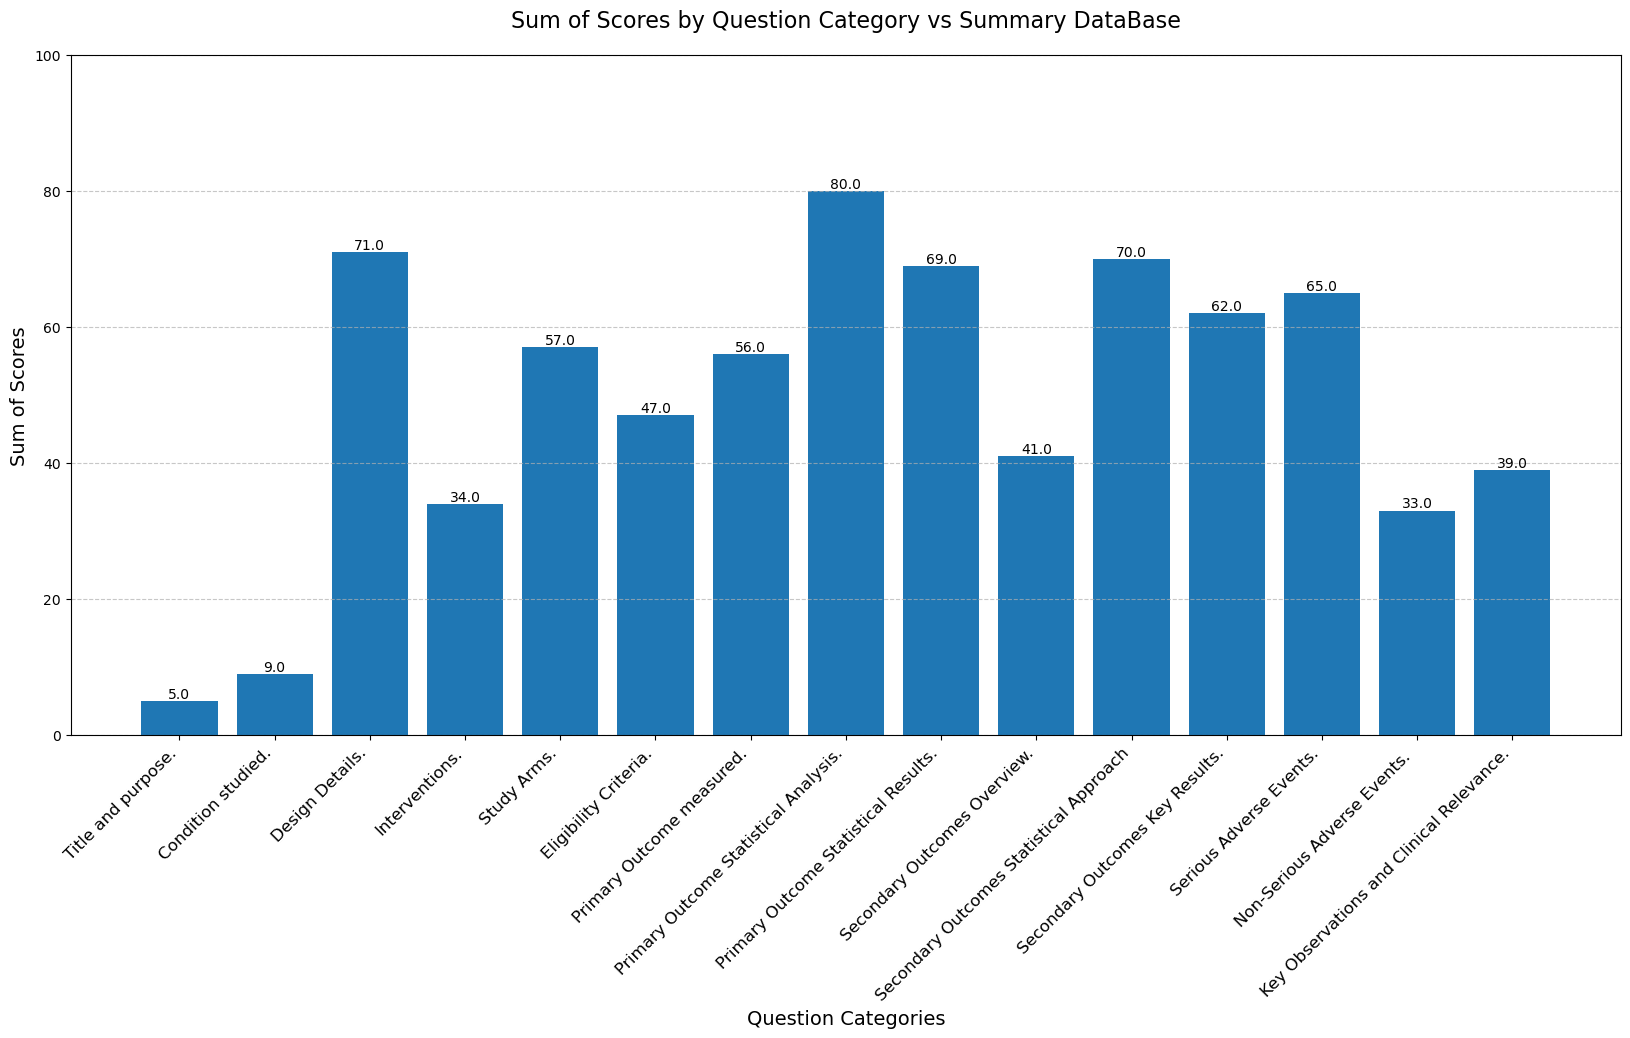

Plot saved as 'score_Paragraph_distribution_Title.png'


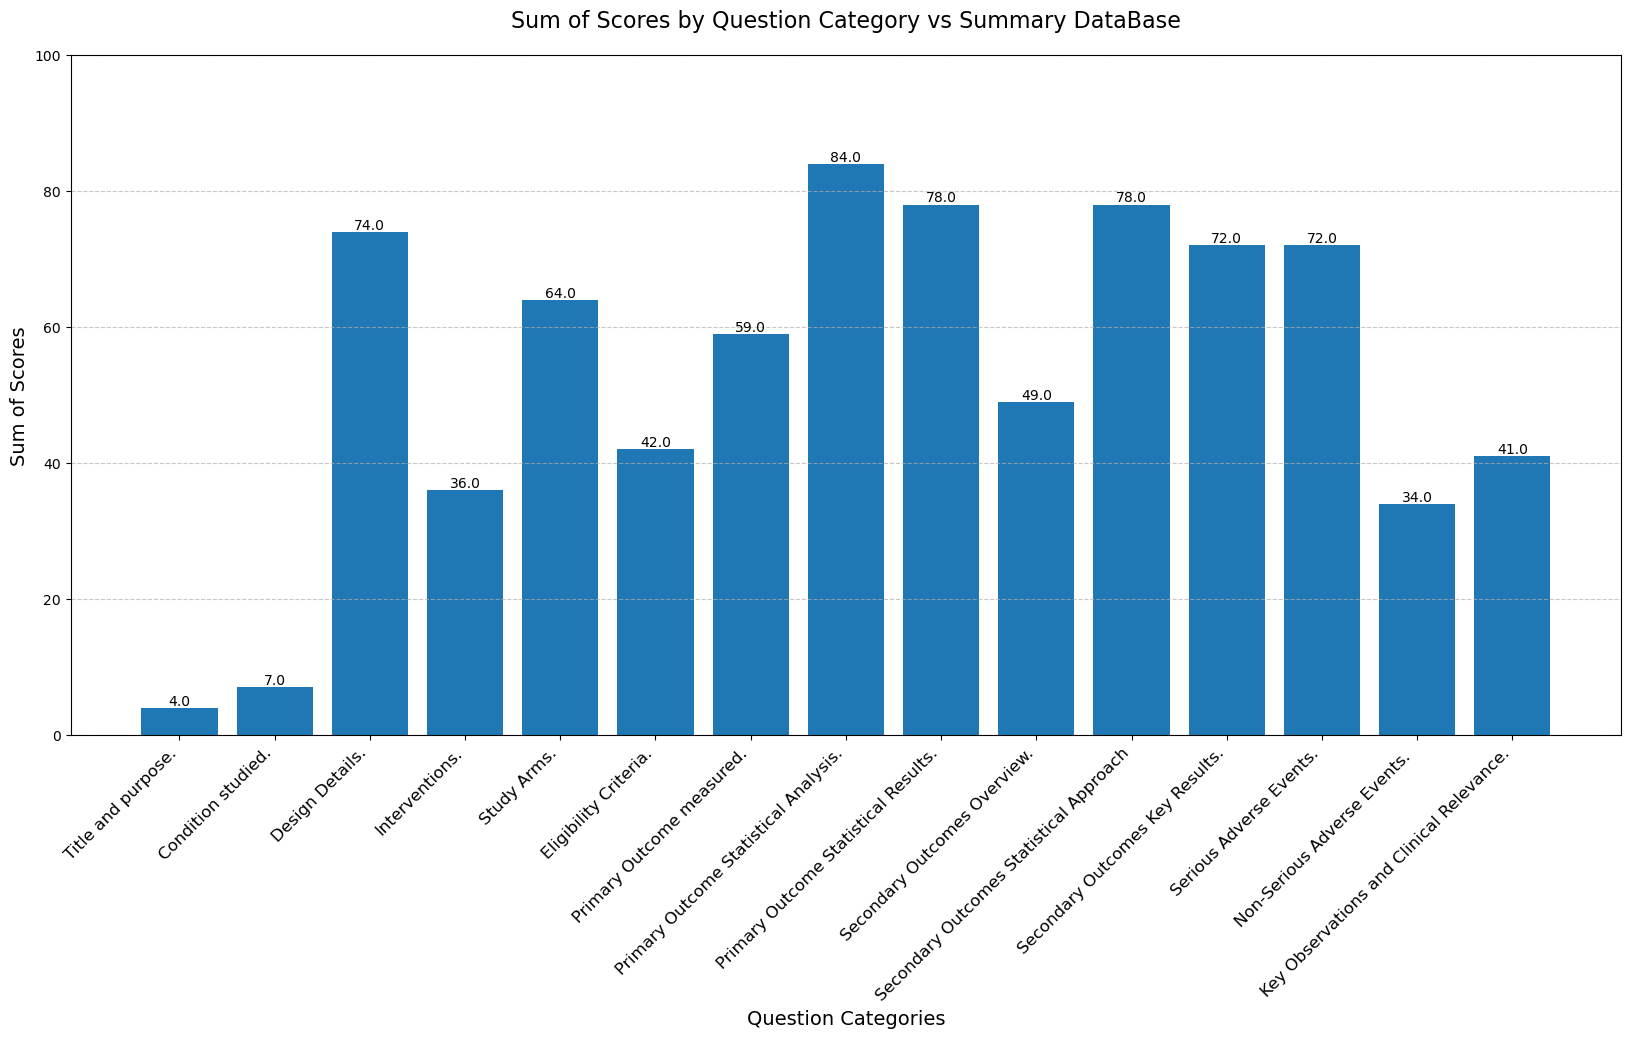

In [10]:
# Specify your folder path
folder_path = "Evaluation_title_Paragraph"  # Change this to your folder path
        
# Analyze scores
#direct_score_sums, score_sums, total_files = analyze_scores(folder_path)
# analize scores without 0.5
direct_score_sums, score_sums, total_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
        
# # Print results
# print("\nScore sums for each question:")
# for q, sum_score in score_sums.items():
#     print(f"{q}: {sum_score:.1f} ")
    
# for q, sum_score in direct_score_sums.items():
#     print(f"{q}: {sum_score:.1f} ")    
        
# Plot results
plot_scores(direct_score_sums, total_files, 'direct_score_Paragraph_distribution_Title.png')
plot_scores(score_sums, total_files, 'score_Paragraph_distribution_Title.png')

## JSON

Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1429.79it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 83
  0.5 count: 16 (16.00%)
  Sum (excluding 0.5): 1
Q2:
  Total count: 100  Facts: 80
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 2
Q3:
  Total count: 100  Facts: 73
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 12
Q4:
  Total count: 100  Facts: 60
  0.5 count: 19 (19.00%)
  Sum (excluding 0.5): 21
Q5:
  Total count: 100  Facts: 59
  0.5 count: 21 (21.00%)
  Sum (excluding 0.5): 20
Q6:
  Total count: 100  Facts: 48
  0.5 count: 24 (24.00%)
  Sum (excluding 0.5): 28
Q7:
  Total count: 100  Facts: 73
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 14
Q8:
  Total count: 100  Facts: 54
  0.5 count: 22 (22.00%)
  Sum (excluding 0.5): 24
Q9:
  Total count: 100  Facts: 70
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 12
Q10:
  Total count: 100  Facts: 65
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 17
Q11:
  Total count: 100  Facts: 55
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 27
Q12:
  To

Plot saved as 'direct_score_Paragraph_distribution_JSON.png'


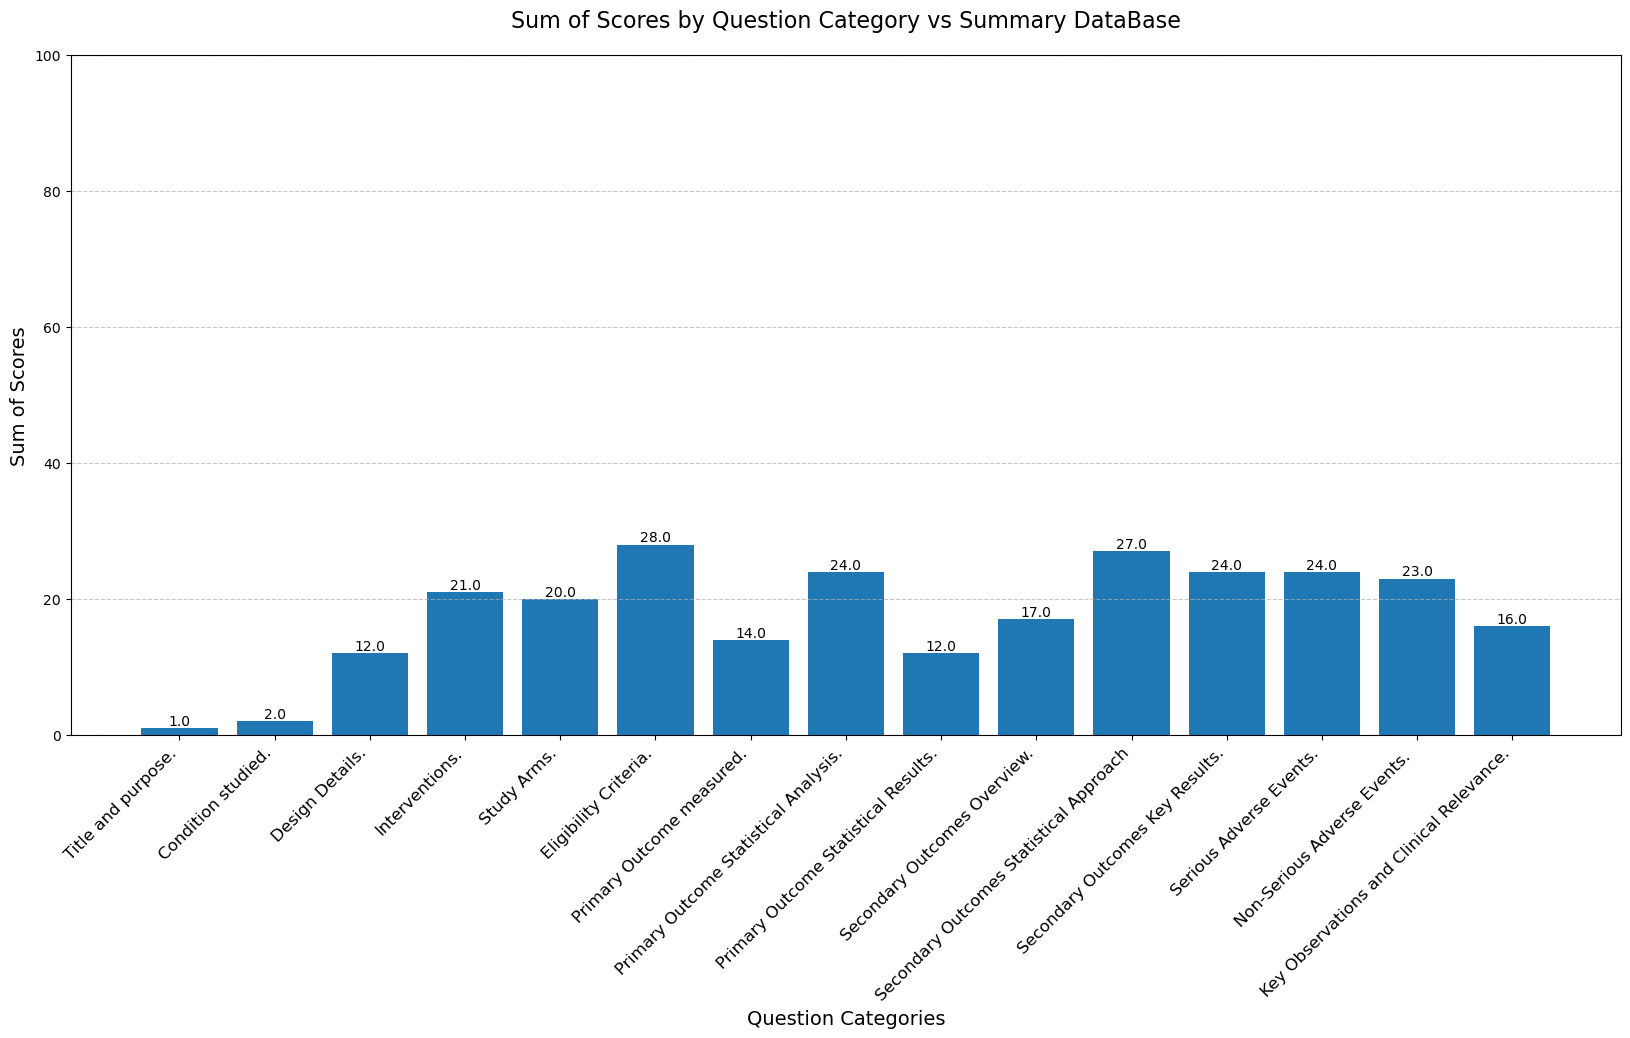

Plot saved as 'score_Paragraph_distribution_JSON.png'


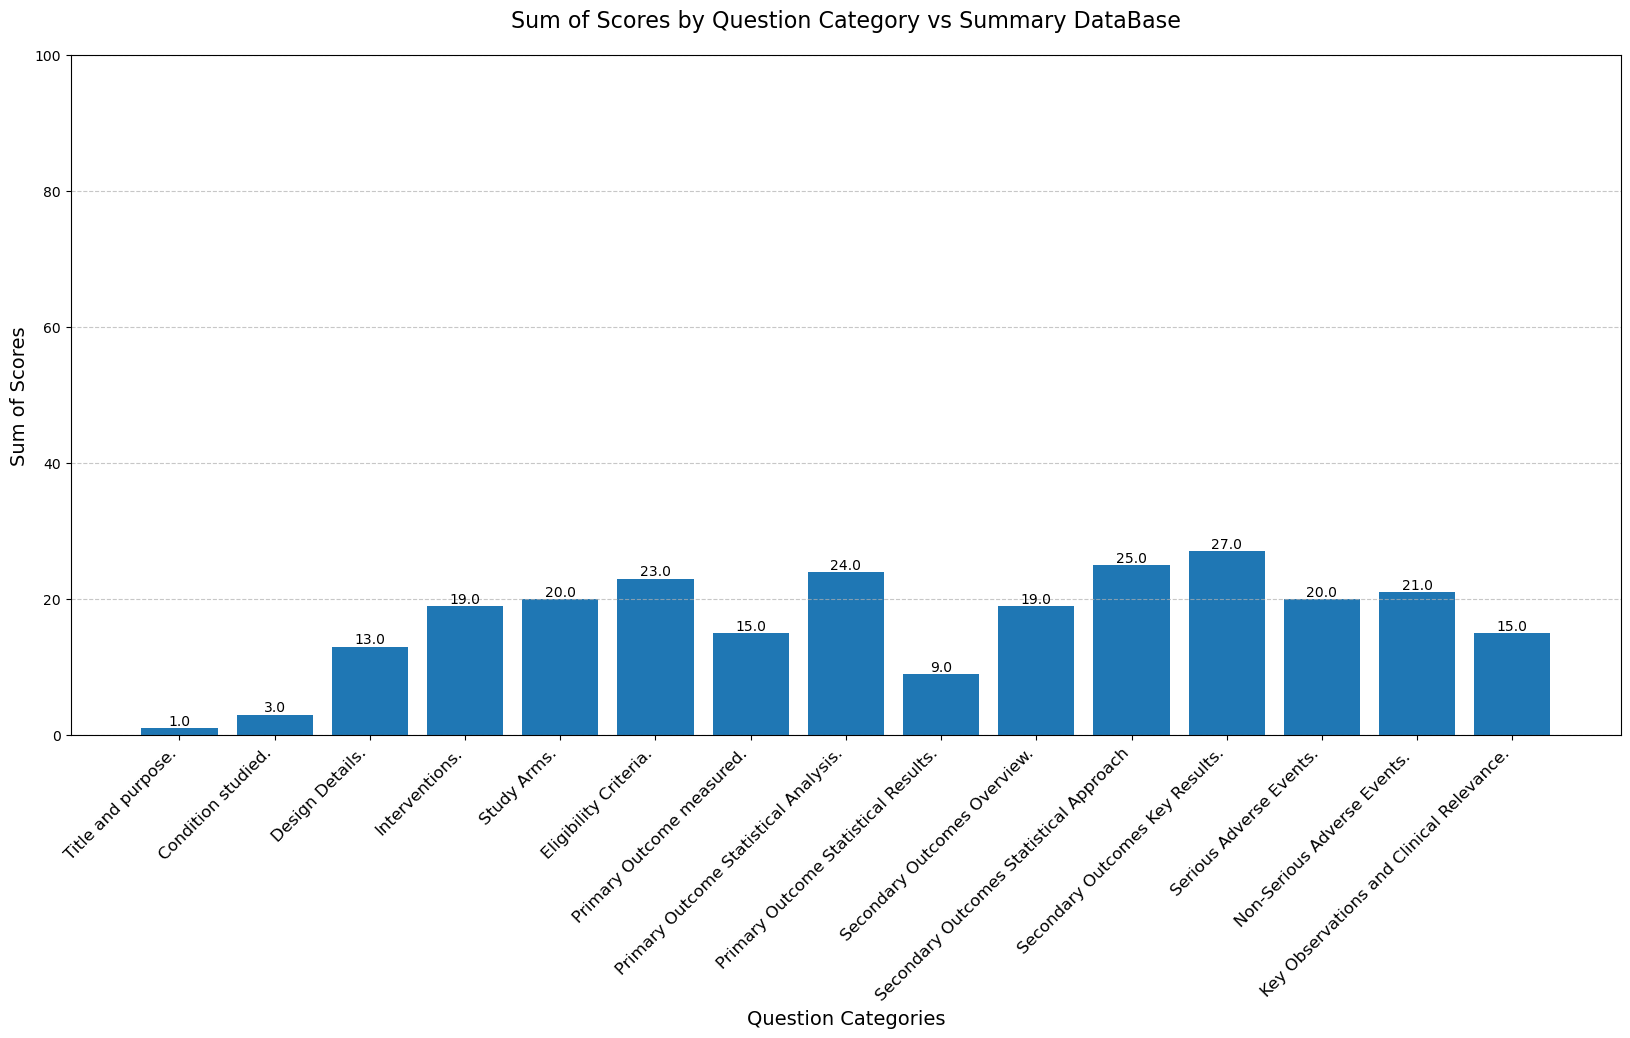

In [11]:
# Specify your folder path
folder_path = "Evaluation_json_Paragraph"  # Change this to your folder path
        
# Analyze scores
#direct_score_sums, score_sums, total_files = analyze_scores(folder_path)
# analize scores without 0.5
direct_score_sums, score_sums, total_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
        
# Plot results
plot_scores(direct_score_sums, total_files, 'direct_score_Paragraph_distribution_JSON.png')
plot_scores(score_sums, total_files, 'score_Paragraph_distribution_JSON.png')

## Summary

Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2634.58it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 84
  0.5 count: 14 (14.00%)
  Sum (excluding 0.5): 2
Q2:
  Total count: 100  Facts: 79
  0.5 count: 20 (20.00%)
  Sum (excluding 0.5): 1
Q3:
  Total count: 100  Facts: 83
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 4
Q4:
  Total count: 100  Facts: 79
  0.5 count: 20 (20.00%)
  Sum (excluding 0.5): 1
Q5:
  Total count: 100  Facts: 75
  0.5 count: 23 (23.00%)
  Sum (excluding 0.5): 2
Q6:
  Total count: 100  Facts: 86
  0.5 count: 14 (14.00%)
  Sum (excluding 0.5): 0
Q7:
  Total count: 100  Facts: 86
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 1
Q8:
  Total count: 100  Facts: 80
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 5
Q9:
  Total count: 100  Facts: 78
  0.5 count: 19 (19.00%)
  Sum (excluding 0.5): 3
Q10:
  Total count: 100  Facts: 86
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 1
Q11:
  Total count: 100  Facts: 82
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 3
Q12:
  Total count

Plot saved as 'direct_score_Paragraph_distribution_Summary.png'


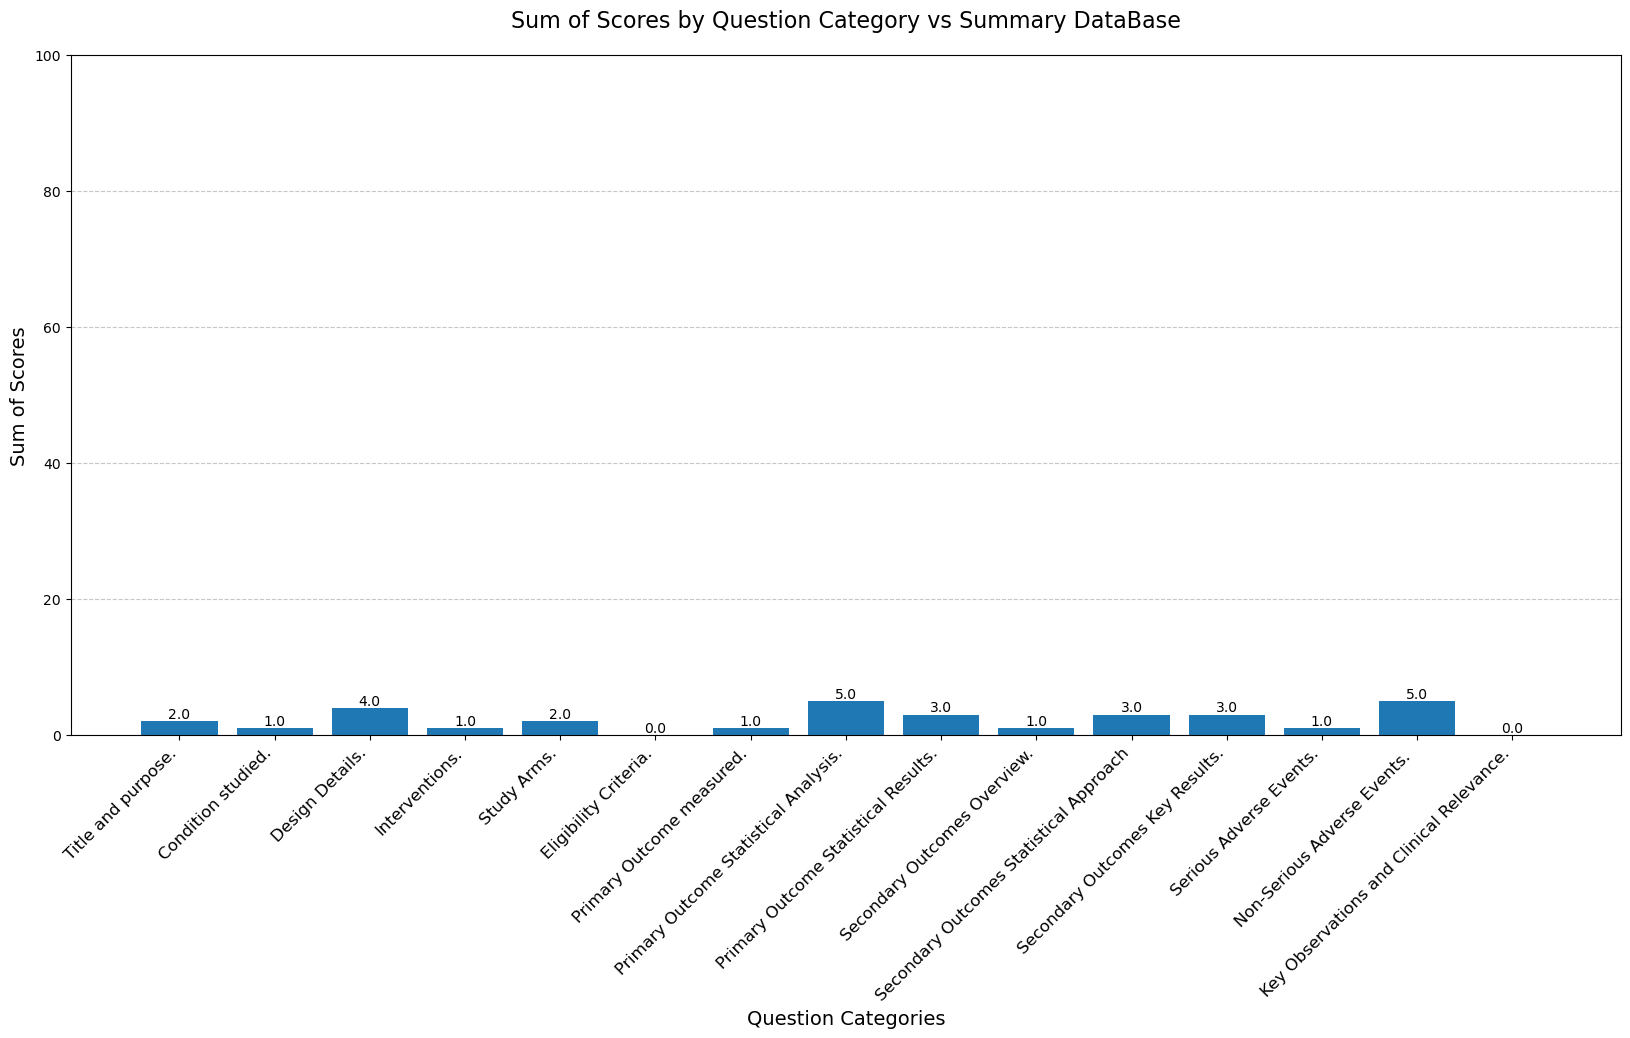

Plot saved as 'score_Paragraph_distribution_Summary.png'


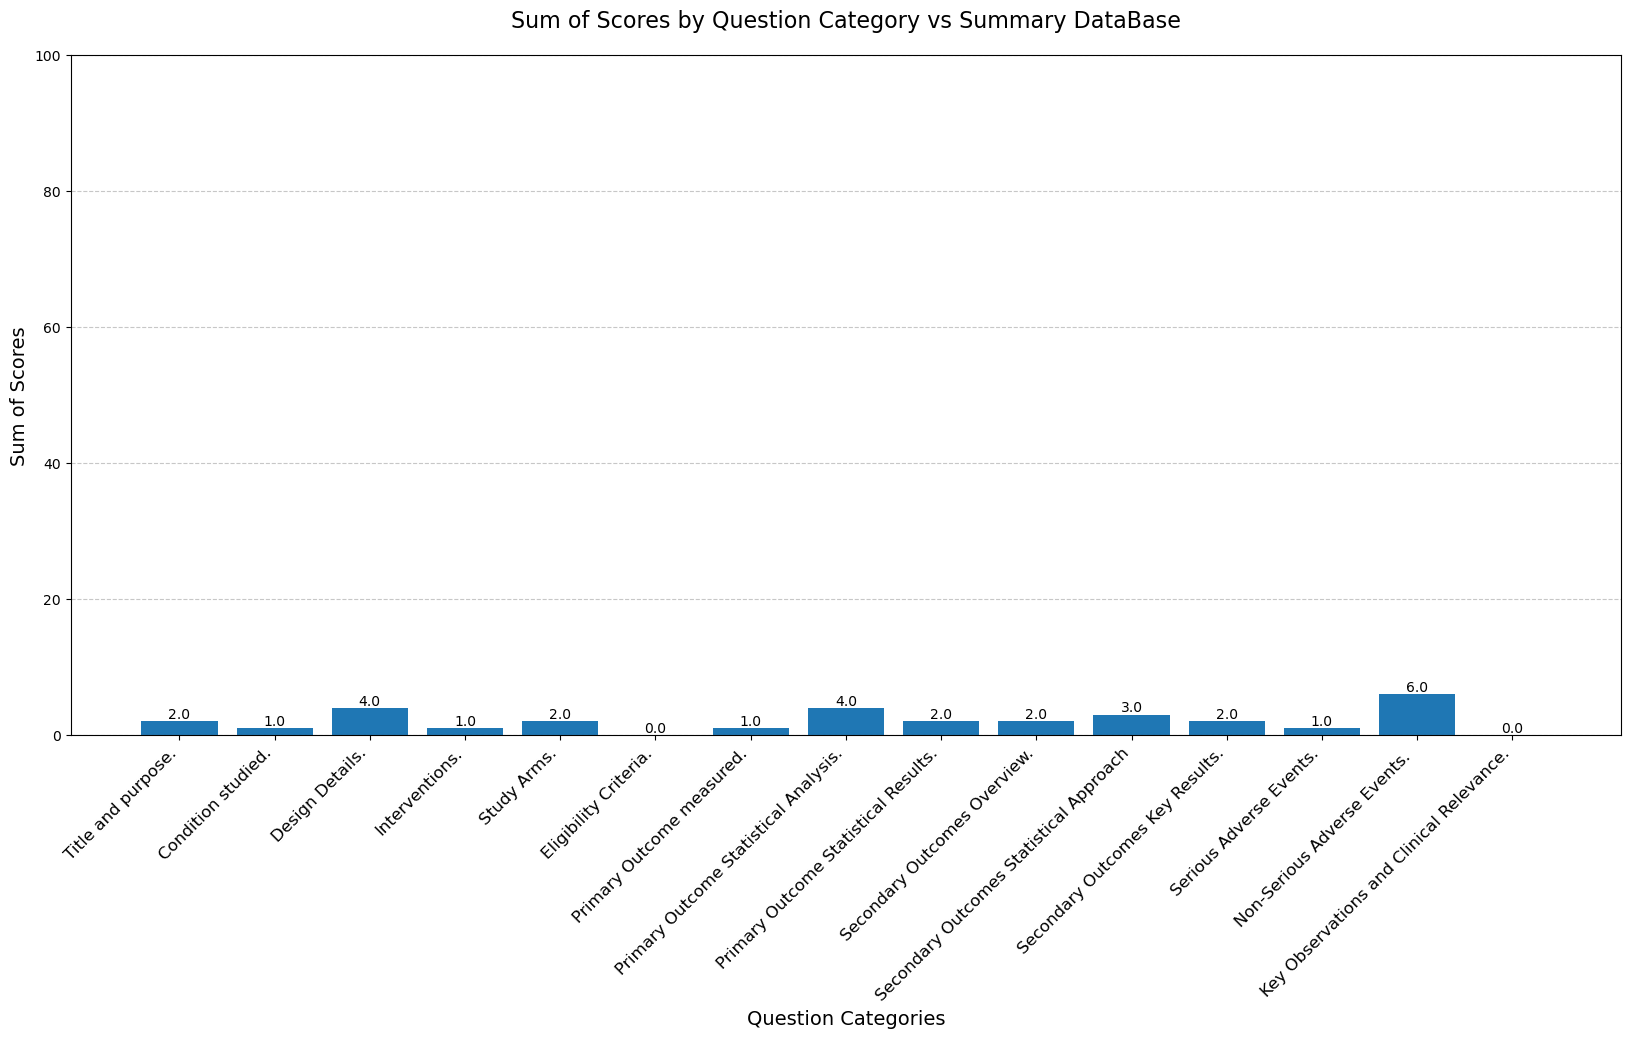

In [12]:
# Specify your folder path
folder_path = "Evaluation_summary_Paragraph"  # Change this to your folder path
        
# Analyze scores
#direct_score_sums, score_sums, total_files = analyze_scores(folder_path)
# analize scores without 0.5
direct_score_sums, score_sums, total_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
        
# Plot results
plot_scores(direct_score_sums, total_files, 'direct_score_Paragraph_distribution_Summary.png')
plot_scores(score_sums, total_files, 'score_Paragraph_distribution_Summary.png')

## All togheter

Found 100 files to process


Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 9539.45it/s]



Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 84
  0.5 count: 14 (14.00%)
  Sum (excluding 0.5): 2
Q2:
  Total count: 100  Facts: 79
  0.5 count: 20 (20.00%)
  Sum (excluding 0.5): 1
Q3:
  Total count: 100  Facts: 83
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 4
Q4:
  Total count: 100  Facts: 79
  0.5 count: 20 (20.00%)
  Sum (excluding 0.5): 1
Q5:
  Total count: 100  Facts: 75
  0.5 count: 23 (23.00%)
  Sum (excluding 0.5): 2
Q6:
  Total count: 100  Facts: 86
  0.5 count: 14 (14.00%)
  Sum (excluding 0.5): 0
Q7:
  Total count: 100  Facts: 86
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 1
Q8:
  Total count: 100  Facts: 80
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 5
Q9:
  Total count: 100  Facts: 78
  0.5 count: 19 (19.00%)
  Sum (excluding 0.5): 3
Q10:
  Total count: 100  Facts: 86
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 1
Q11:
  Total count: 100  Facts: 82
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 3
Q12:
  Total count

Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 7817.32it/s]



Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 83
  0.5 count: 16 (16.00%)
  Sum (excluding 0.5): 1
Q2:
  Total count: 100  Facts: 80
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 2
Q3:
  Total count: 100  Facts: 73
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 12
Q4:
  Total count: 100  Facts: 60
  0.5 count: 19 (19.00%)
  Sum (excluding 0.5): 21
Q5:
  Total count: 100  Facts: 59
  0.5 count: 21 (21.00%)
  Sum (excluding 0.5): 20
Q6:
  Total count: 100  Facts: 48
  0.5 count: 24 (24.00%)
  Sum (excluding 0.5): 28
Q7:
  Total count: 100  Facts: 73
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 14
Q8:
  Total count: 100  Facts: 54
  0.5 count: 22 (22.00%)
  Sum (excluding 0.5): 24
Q9:
  Total count: 100  Facts: 70
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 12
Q10:
  Total count: 100  Facts: 65
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 17
Q11:
  Total count: 100  Facts: 55
  0.5 count: 18 (18.00%)
  Sum (excluding 0.5): 27
Q12:
  To

Processing files: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 6452.38it/s]


Direct Score:
----------------------------------------
Q1:
  Total count: 100  Facts: 74
  0.5 count: 21 (21.00%)
  Sum (excluding 0.5): 5
Q2:
  Total count: 100  Facts: 66
  0.5 count: 25 (25.00%)
  Sum (excluding 0.5): 9
Q3:
  Total count: 100  Facts: 10
  0.5 count: 19 (19.00%)
  Sum (excluding 0.5): 71
Q4:
  Total count: 100  Facts: 43
  0.5 count: 23 (23.00%)
  Sum (excluding 0.5): 34
Q5:
  Total count: 100  Facts: 22
  0.5 count: 21 (21.00%)
  Sum (excluding 0.5): 57
Q6:
  Total count: 100  Facts: 23
  0.5 count: 30 (30.00%)
  Sum (excluding 0.5): 47
Q7:
  Total count: 100  Facts: 31
  0.5 count: 13 (13.00%)
  Sum (excluding 0.5): 56
Q8:
  Total count: 100  Facts: 5
  0.5 count: 15 (15.00%)
  Sum (excluding 0.5): 80
Q9:
  Total count: 100  Facts: 9
  0.5 count: 22 (22.00%)
  Sum (excluding 0.5): 69
Q10:
  Total count: 100  Facts: 30
  0.5 count: 29 (29.00%)
  Sum (excluding 0.5): 41
Q11:
  Total count: 100  Facts: 8
  0.5 count: 22 (22.00%)
  Sum (excluding 0.5): 70
Q12:
  Total

Plot saved as direct_score_comparison_Paragraph.png


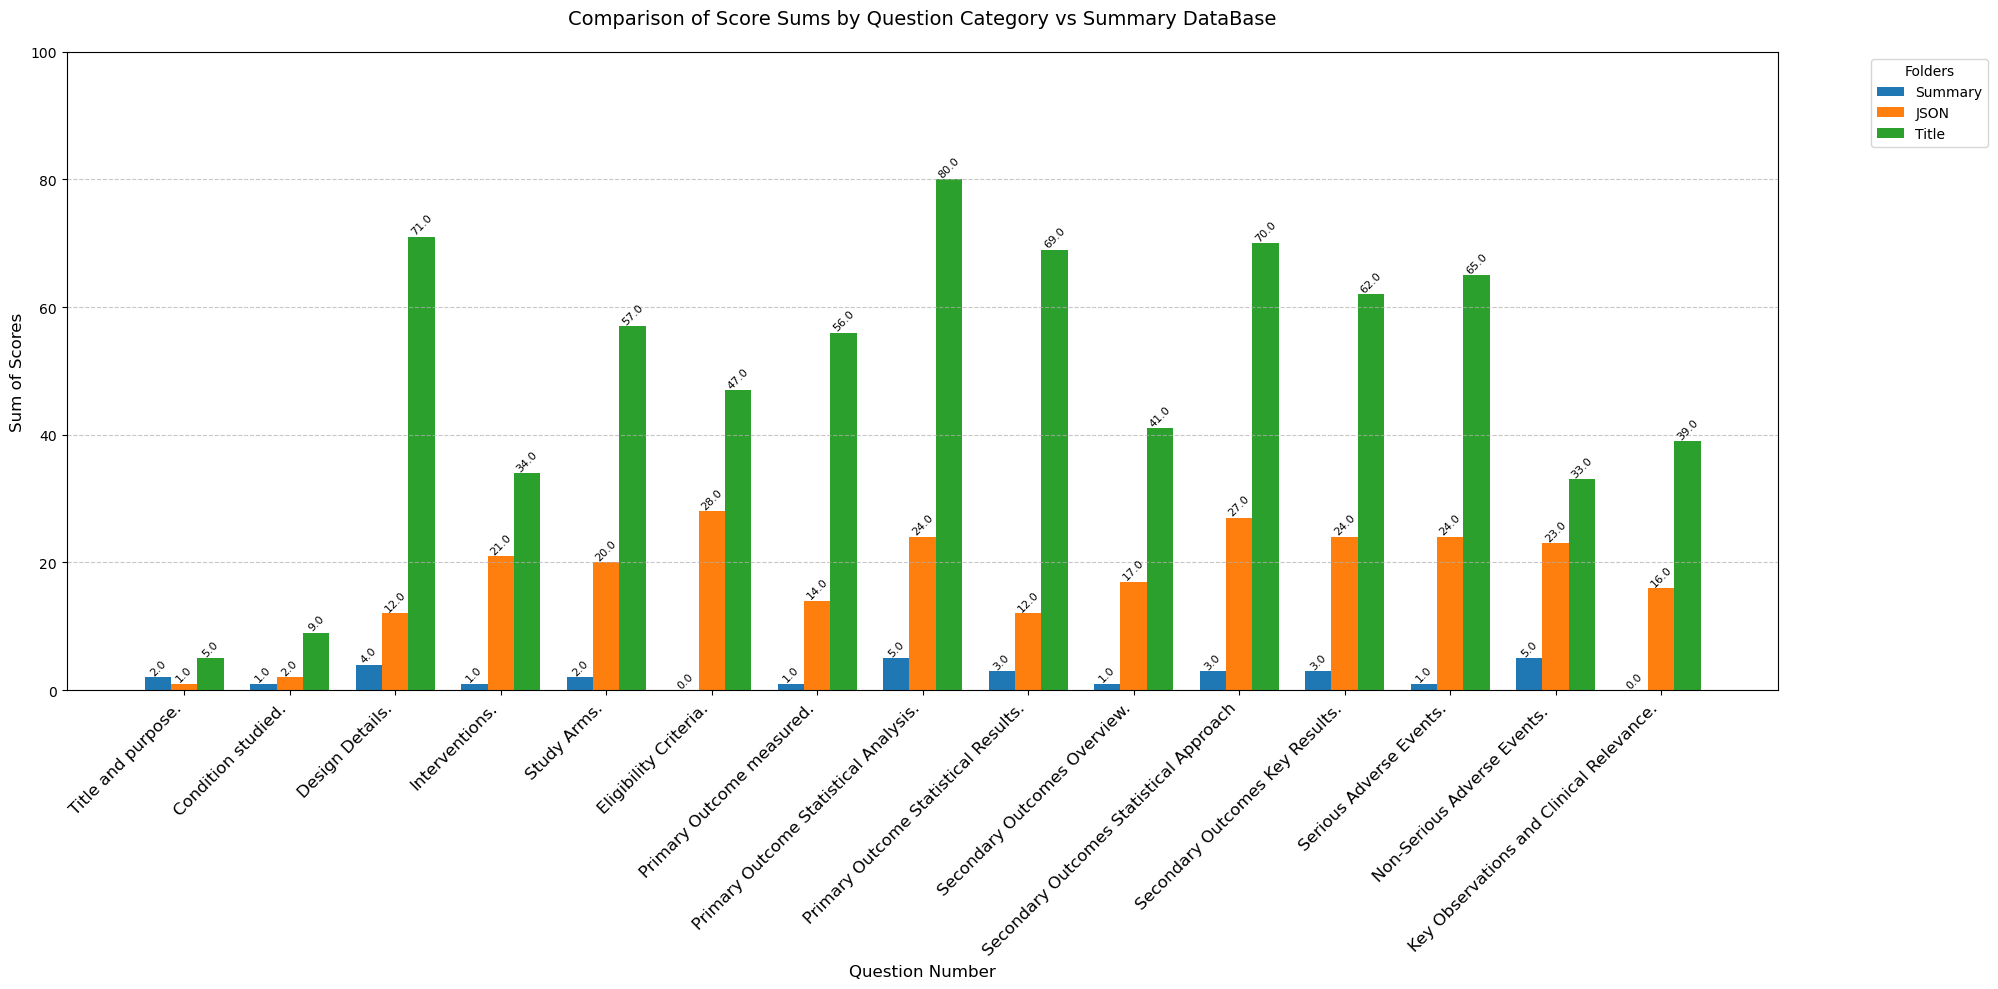

Plot saved as score_comparison_Paragraph.png


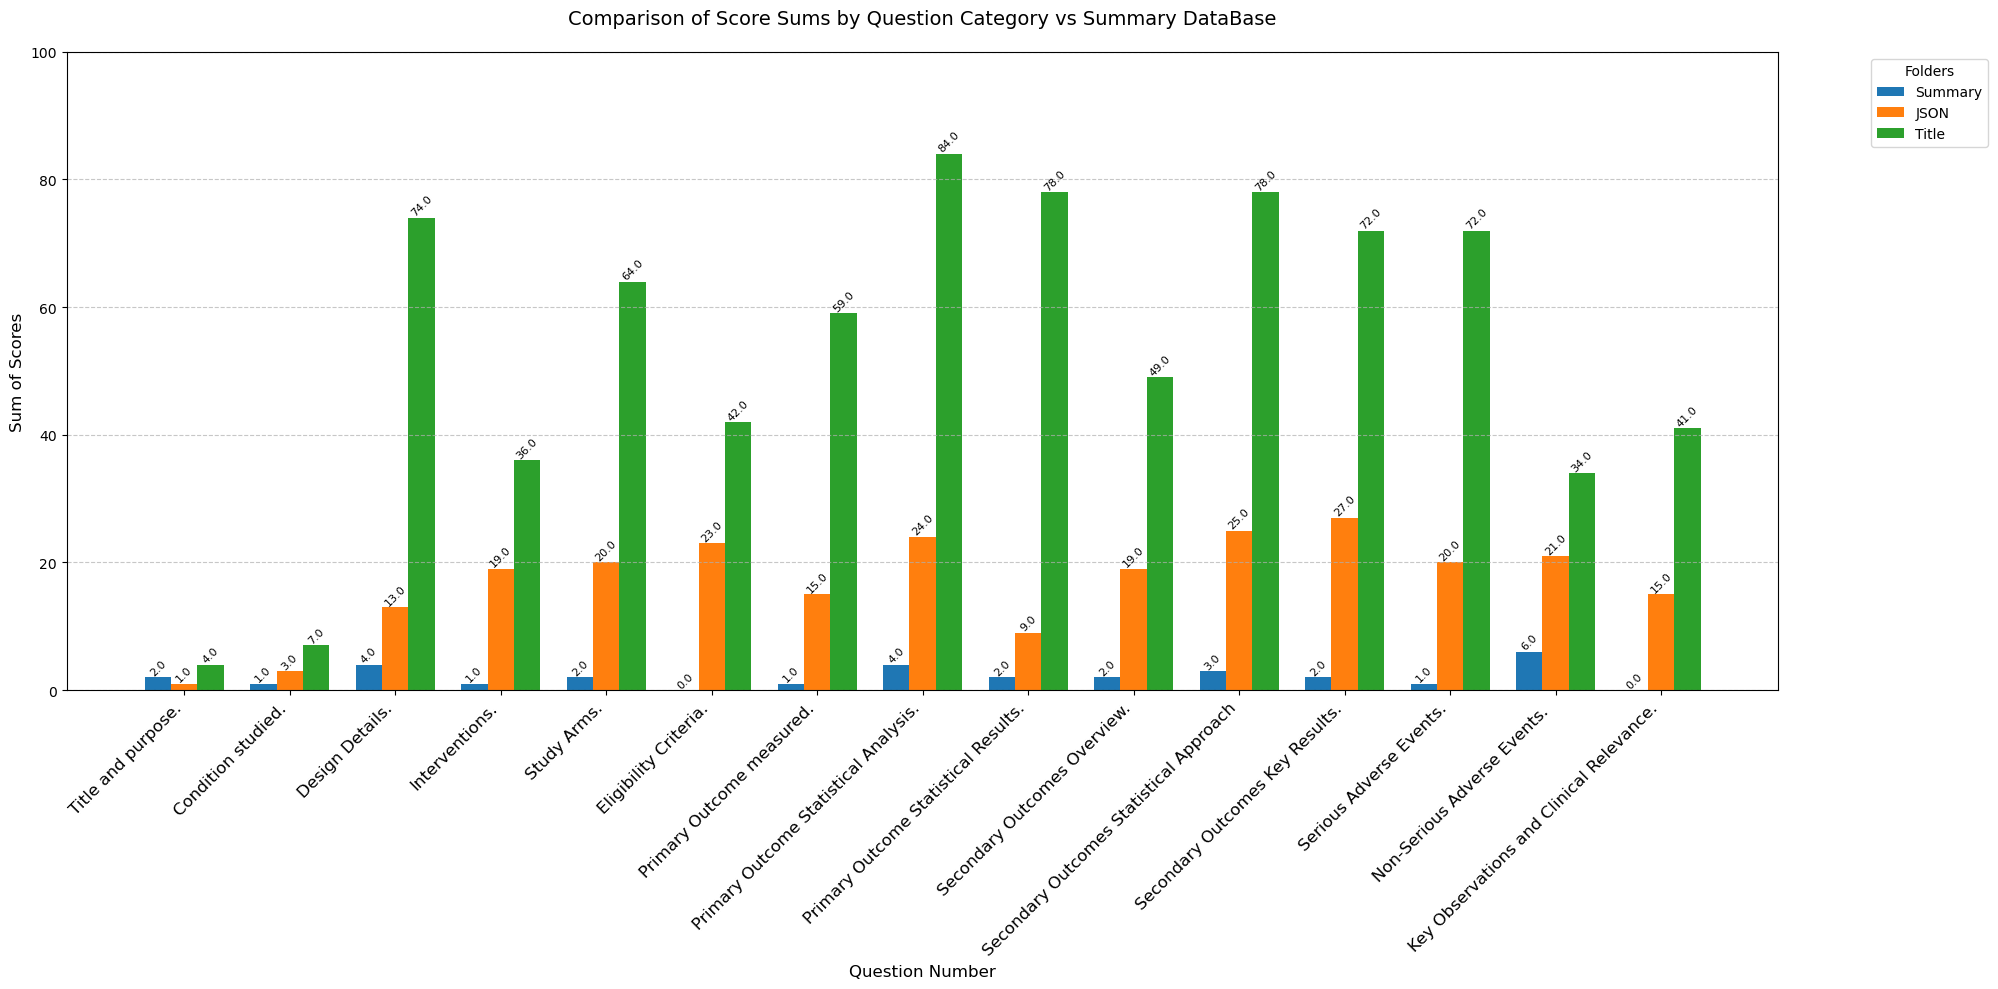

In [13]:
def plot_multiple_scores(all_scores: dict, total_files: dict, folder_names: list, name: str):
    """
    Create a bar plot comparing scores from multiple folders.
    
    Args:
        all_scores: Dictionary containing score sums for each folder
        total_files: Dictionary containing total files for each folder
        folder_names: List of folder names for legend
    """
    x_axes_names = {
        1: "Title and purpose.",
        2: "Condition studied.",
        3: "Design Details.",
        4: "Interventions.",
        5: "Study Arms.",
        6: "Eligibility Criteria.",
        7: "Primary Outcome measured.",
        8: "Primary Outcome Statistical Analysis.",
        9: "Primary Outcome Statistical Results.",
        10: "Secondary Outcomes Overview.",
        11: "Secondary Outcomes Statistical Approach",
        12: "Secondary Outcomes Key Results.",
        13: "Serious Adverse Events.",
        14: "Non-Serious Adverse Events. ",
        15: "Key Observations and Clinical Relevance."
    }
    
    # Prepare data for plotting
    questions = list(range(1, 16))
    width = 0.25  # Width of bars
    
    # Create figure and axis with larger size
    plt.figure(figsize=(20, 10))
    
    # Create bars for each folder
    positions = np.array(questions)
    for i, (folder, scores) in enumerate(all_scores.items()):
        offset = (i - 1) * width
        scores_list = [scores[f"Q{q}"] for q in questions]
        bars = plt.bar(positions + offset, scores_list, width, 
                      label=folder_names[i])
        
        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}',
                    ha='center', va='bottom', fontsize=8, rotation=45)
    
    # Customize plot
    plt.title('Comparison of Score Sums by Question Category vs Summary DataBase', fontsize=14, pad=20)
    plt.xlabel('Question Number', fontsize=12)
    plt.ylabel('Sum of Scores', fontsize=12)
    
    # Set x-axis ticks with rotated labels
    plt.xticks(questions, 
               [x_axes_names[i] for i in questions],
               rotation=45,
               ha='right',
               fontsize=12)
    
    # Set y-axis limit from 0 to maximum total files
    plt.ylim(0, max(total_files.values()))
    
    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Add legend
    plt.legend(title="Folders", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save plot
    plt.savefig(name, dpi=300, bbox_inches='tight')
    print(f"Plot saved as {name}")
    
    # Show plot
    plt.show()

def main():
    """Main execution function."""
    try:
        # Specify your folder paths
        folders = {
            "folder1": "Evaluation_summary_Paragraph",  # Change these to your folder paths
            "folder2": "Evaluation_json_Paragraph",
            "folder3": "Evaluation_title_Paragraph"
        }
        
        # Friendly names for the legend
        folder_names = [
            "Summary",  # Change these to your preferred labels
            "JSON",
            "Title"
        ]
        
        # Analyze scores for each folder
        all_direct_scores = {}
        all_scores = {}
        total_files = {}
        
        for folder_key, folder_path in folders.items():
            # direct_scores, scores, num_files = analyze_scores(folder_path)
            direct_scores, scores, num_files, direct_half, score_half, direct_totals, score_totals = analyze_scores(folder_path)
            all_direct_scores[folder_key] = direct_scores
            all_scores[folder_key] = scores
            total_files[folder_key] = num_files
        
        # # Print results
        # print("\nScore sums for each question by folder:")
        # for folder_key, scores in all_scores.items():
        #     print(f"\n{folder_names[list(folders.keys()).index(folder_key)]}:")
        #     for q, sum_score in scores.items():
        #         print(f"{q}: {sum_score:.1f}")
        
        # Plot results
        # Plot results
        plot_multiple_scores(all_direct_scores, total_files, folder_names, "direct_score_comparison_Paragraph.png")
        plot_multiple_scores(all_scores, total_files, folder_names, "score_comparison_Paragraph.png")
        
    except Exception as e:
        print(f"Error in main: {e}")

if __name__ == "__main__":
    main()